In [ ]:
# RACHANA CHOUDHARY 18510063 nITISH GOYAL 18510053 GROUP-5

# PH509 Lab 3B

## Adding dissipation and a driving force to the pendulum

Consider a pendulum which is driven externally by a periodic force $F_d \, sin \, \omega_d t$ and whose motion is damped in air by a frictional force proportional to the instantaneous velocity. Thus we have:

$$ \frac{d^2 \theta}{dt^2} = - \sqrt{\frac{g}{\ell}} \theta - q \frac{d \theta}{dt} + F_d \, \sin \, \omega_d t $$

where $q$ is a parameter that measures the strength of damping and $F_d$ is the strength of
the periodic force that is being applied at a frequency $\omega_d$. It turns out that the above equation can also be solved analytically but in this lab, we shall explore the behavior of this realistic pendulum numerically.
 
### Prob: A

Comment on the sign of various terms on the RHS.

### Prob: B

First study the oscillations of this pendulum. You may choose the parameters
as $\omega_d = 2$, $q = 1, 0$ and $F_d = 0.2$ with the initial amplitude $\theta(0) = 0.2$ radians. Explain the nature of the oscillations. What happens at early times and at late
times?

### Prob: C

Calculate the power absorbed by the oscillator from the forcing agent for different values of the driving frequency. This can be calculated from $P = \langle \vec F \cdot \vec v \rangle$ where $\langle \cdot \rangle$ denotes time-averaging. By plotting $P$ vs $\omega_d$, show that the oscillator absorbs the maximum power at its resonance frequency. The shape of this $\textit {resonance curve}$ is known as the Lorentzian. What does the shape of the Lorentzian tell you about the oscillator? In other words, can you obtain the parameters of the oscillator from the resonance curve? What role does the damping factor $q$ play in determining the shape of the resonance? You can check by taking different values of $q$ and plotting the resonance curves for each of them.

### Prob: D

How would you choose the value of $\Delta t$ for this problem?

Prob A
Sign on the various terms on right hand side can be explained as follows
the coefficient of theta must be negative for oscillatory behaviour,coefficient of theta dot should be negative so that there is dissipation and not gaining and third term is driving force which can be positive or negative

Prob B

Prob A
The coefficient of theta is negative which is responsible for oscillatory behaviour, the coefficient of omega is negative which is responsible for damping and the third term is driving force which is oscillatory in above case.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def leapfrog(x0,v0,t0,T,k,omega,q):   # k=g/l
    v=[v0]
    x=[x0]
    a=[]
    vhalf=[]
    k=1
    
    f=0.2
    x0=.2
    t=np.linspace(t0,T,1000)
    dt=t[1]-t[0]
    a.append(0)
    a[0]=-k*x[0]-q*v[0]+f*np.sin(omega*t[0])   #for above given differential equation

    vhalf.append(0)
    vhalf[0]=v[0]+a[0]*dt/2
    for i in range(999):
        a.append(0)
        a[i]=-k*x[i]-q*vhalf[i]+f*np.sin(omega*t[i])
        vhalf.append(0)
        vhalf[i+1]=vhalf[i]+a[i]*dt
        x.append(0)
        x[i+1]=x[i]+vhalf[i+1]*dt
    x=np.array(x)
    vhalf=np.array(vhalf)    
    a=np.array(a)
    v=vhalf+a*dt/2
    v=np.insert(v,0,v0)
    v=np.delete(v,len(v)-1)

    return [x,v,a,t]

In [127]:
x1,v1,a1,t=leapfrog(.2,0,0,70,.01,2,0)
x2,v2,a2,t=leapfrog(.2,0,0,70,.01,2,1)

print(len(v1),len(a))

1000 1000


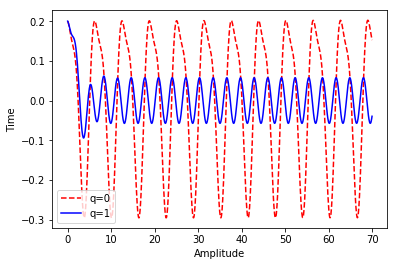

In [128]:
plt.plot(t,x1,'r--',label='q=0')
plt.plot(t,x2,'b',label='q=1')
plt.xlabel('Amplitude')
plt.ylabel('Time')

plt.legend()

Initially the system is in its natural frequency. It does all kind of wobbly things until it oscillates with the frequecy of driving force.
But in case of q=0 natural frequency matches the frequency of driven oscillator as visible in above plot.

Power absorbed as a function of frequency of driving force

In [129]:
def p_avg(w,q):
    return (sum(leapfrog(.2,0,0,30,.01,w,q)[1]*leapfrog(.2,0,0,30,.01,w,q)[2])/1000)


In [130]:
q0=np.linspace(0,1,10)

Text(0, 0.5, 'Power absorbed')

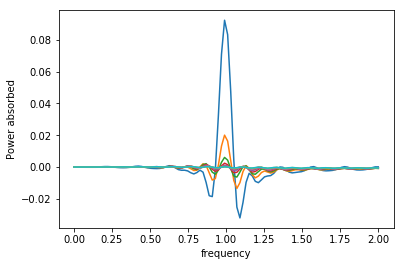

In [131]:
w0=np.linspace(0,2,100)

for j in q0:
    power=[]
    for i in w0:

        power.append(p_avg(i,j))

    
    plt.plot(w0,power)
plt.xlabel('frequency')
plt.ylabel('Power absorbed')

Clearly we can see that we get a lorentzian plot which shows that at a particular resonance frequency the power absorbed is maximum.

On changing q, the average power absorbed decreased. So the the height of peak can tell us q and also the resonance frequency tells us the natural frequency of oscillator which is related to ratio $\sqrt{g/l}$



prob 3D
